In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

## Step 1: Data Collection

In [2]:
# Study the dataset:

FILEPATH = 'Delinquency_prediction_dataset.xlsx'

# Use the provided helper to read all sheets quickly
try:
    data = read_all_sheets_from_excel("C:\\Users\\ASUS\\Desktop\\TCS VIRTUAL INTERNSHIP\\DOCUMENTS\\TCS\\Delinquency_prediction_dataset.xlsx")
except NameError:
    # Fallback if helper is not defined; use pandas with calamine engine
    data = pd.read_excel("C:\\Users\\ASUS\\Desktop\\TCS VIRTUAL INTERNSHIP\\DOCUMENTS\\TCS\\Delinquency_prediction_dataset.xlsx", sheet_name=None, engine='calamine')

for k, v in data.items():
    print('data: ' + k)
    print(v.head(15))

data: Delinquency_prediction_dataset
   Customer_ID  Age    Income  Credit_Score  Credit_Utilization  \
0     CUST0001   56  165580.0         398.0            0.390502   
1     CUST0002   69  100999.0         493.0            0.312444   
2     CUST0003   46  188416.0         500.0            0.359930   
3     CUST0004   32  101672.0         413.0            0.371400   
4     CUST0005   60   38524.0         487.0            0.234716   
5     CUST0006   25   84042.0         700.0            0.650540   
6     CUST0007   38   35056.0         354.0            0.390581   
7     CUST0008   56  123215.0         415.0            0.532715   
8     CUST0009   36   66991.0         405.0            0.413035   
9     CUST0010   40   34870.0         679.0            0.361824   
10    CUST0011   28   42532.0         340.0            0.834456   
11    CUST0012   28   70479.0         679.0            0.684586   
12    CUST0013   41   56975.0         320.0            0.126360   
13    CUST0014   70  1170

## Step 2: Data Understanding

In [3]:
# To Display First 5 rows:

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
df.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [4]:
# To Display last 5 rows:

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
df.tail()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
495,CUST0496,71,48307.0,688.0,0.486522,2,0,12707.0,0.373033,retired,9,Business,Phoenix,On-time,On-time,Missed,On-time,On-time,Late
496,CUST0497,60,86180.0,836.0,0.608174,2,1,45595.0,0.291943,Unemployed,18,Student,Houston,On-time,On-time,Late,Late,Late,Missed
497,CUST0498,54,152326.0,847.0,0.676950,0,0,44449.0,0.104839,Employed,16,Student,Phoenix,On-time,Late,Late,On-time,Late,Missed
498,CUST0499,50,105852.0,343.0,0.700643,2,1,11155.0,0.236477,Employed,11,Student,Phoenix,Late,On-time,Late,Missed,On-time,Missed
499,CUST0500,25,40945.0,442.0,0.911370,1,0,36968.0,0.370422,Self-employed,0,Business,Houston,Missed,Late,Late,On-time,Late,On-time


In [5]:
# Check the Shape of the data:

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
df.shape

(500, 19)

In [6]:
# To Displays the columns:

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
df.columns

Index(['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization',
       'Missed_Payments', 'Delinquent_Account', 'Loan_Balance',
       'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure',
       'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6'],
      dtype='object')

In [7]:
# To Check the Datatypes of Data:

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
print(df.dtypes)

Customer_ID              object
Age                       int64
Income                  float64
Credit_Score            float64
Credit_Utilization      float64
Missed_Payments           int64
Delinquent_Account        int64
Loan_Balance            float64
Debt_to_Income_Ratio    float64
Employment_Status        object
Account_Tenure            int64
Credit_Card_Type         object
Location                 object
Month_1                  object
Month_2                  object
Month_3                  object
Month_4                  object
Month_5                  object
Month_6                  object
dtype: object


In [8]:
# Gets General information about the data

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [9]:
# Checking for null values

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
df.isnull().sum()

Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
dtype: int64

In [10]:
# To checking the duplicate values:

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
df.duplicated().sum()

np.int64(0)

In [11]:
# Creating the Data Dictionary with first column being datatype:

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
Data_dict = pd.DataFrame(df.dtypes)
Data_dict

,0
Customer_ID,object
Age,int64
Income,float64
Credit_Score,float64
Credit_Utilization,float64
Missed_Payments,int64
Delinquent_Account,int64
Loan_Balance,float64
Debt_to_Income_Ratio,float64
Employment_Status,object


In [12]:
# identifying the missing values from the dataset:

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
Data_dict['MissingVal'] = df.isnull().sum()
Data_dict

,0,MissingVal
Customer_ID,object,0
Age,int64,0
Income,float64,39
Credit_Score,float64,2
Credit_Utilization,float64,0
Missed_Payments,int64,0
Delinquent_Account,int64,0
Loan_Balance,float64,29
Debt_to_Income_Ratio,float64,0
Employment_Status,object,0


In [13]:
# Identifying unique values . For this I've used nunique() which returns unique elements in the object.:

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
Data_dict['UniqueVal'] = df.nunique()
Data_dict

,0,MissingVal,UniqueVal
Customer_ID,object,0,500
Age,int64,0,57
Income,float64,39,271
Credit_Score,float64,2,234
Credit_Utilization,float64,0,492
Missed_Payments,int64,0,7
Delinquent_Account,int64,0,2
Loan_Balance,float64,29,300
Debt_to_Income_Ratio,float64,0,487
Employment_Status,object,0,6


In [14]:
# renaming the first column using rename():

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict

,DataType,MissingVal,UniqueVal
Customer_ID,object,0,500
Age,int64,0,57
Income,float64,39,271
Credit_Score,float64,2,234
Credit_Utilization,float64,0,492
Missed_Payments,int64,0,7
Delinquent_Account,int64,0,2
Loan_Balance,float64,29,300
Debt_to_Income_Ratio,float64,0,487
Employment_Status,object,0,6


In [15]:
# Basic Statistics view of numerical value:

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
df.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,461.000000,498.000000,500.000000,500.000000,500.000000,471.000000,500.000000,500.000000
mean,46.266000,108379.893709,577.716867,0.491446,2.968000,0.160000,48654.428875,0.298862,9.740000
std,16.187629,53662.723741,168.881211,0.197103,1.946935,0.366973,29395.537273,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,0.000000
25%,33.000000,62295.000000,418.250000,0.356486,1.000000,0.000000,23716.500000,0.233639,5.000000
50%,46.500000,107658.000000,586.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,10.000000
75%,59.250000,155734.000000,727.250000,0.634440,5.000000,0.000000,75546.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


In [16]:
# To see the categorical statistic:

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
df.describe(include='O')

,Customer_ID,Employment_Status,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
count,500,500,500,500,500,500,500,500,500,500
unique,500,6,5,5,3,3,3,3,3,3
top,CUST0500,Unemployed,Gold,Los Angeles,On-time,Late,Late,Late,Missed,Late
freq,1,93,118,107,177,173,169,181,187,172


In [17]:
# Missing values before handling:

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
missing = df.isnull().sum()
missing

Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
dtype: int64

<Axes: >

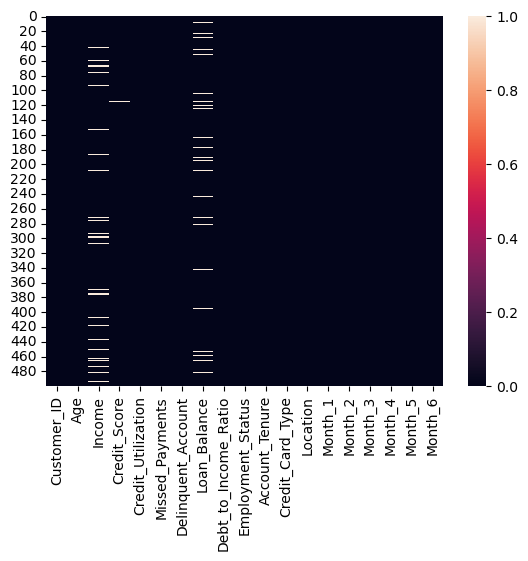

In [18]:
# Heatmap before handling:

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
sns.heatmap(df.isnull())

In [19]:
# To checking the missing values in numerical values: 

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
missing = df.isnull().sum()
print(missing[missing > 0])

Income          39
Credit_Score     2
Loan_Balance    29
dtype: int64


In [20]:
# To handling the missing values:

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Credit_Score'].fillna(df['Credit_Score'].median(), inplace=True)
df['Loan_Balance'].fillna(df['Loan_Balance'].median(), inplace=True)

In [21]:
# Drop the Customer_ID as it is not a useful feature for prediction:

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
df = df.drop('Customer_ID', axis=1)

In [22]:
# Convert categorical features to numerical using one-hot encoding

categorical_cols = ['Employment_Status', 'Credit_Card_Type', 'Location']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [23]:
# Convert payment history columns to numerical values

payment_cols = ['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']
payment_mapping = {'On-time': 0, 'Late': 1, 'Missed': 2}
for col in payment_cols:
    df[col] = df[col].map(payment_mapping)

print("Data after cleaning and preprocessing:")
print(df.head())
print("\nVerifying no more missing values:")
print(df.isnull().sum().sum())

Data after cleaning and preprocessing:
   Age    Income  Credit_Score  Credit_Utilization  Missed_Payments  \
0   56  165580.0         398.0            0.390502                3   
1   69  100999.0         493.0            0.312444                6   
2   46  188416.0         500.0            0.359930                0   
3   32  101672.0         413.0            0.371400                3   
4   60   38524.0         487.0            0.234716                2   

   Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio  Account_Tenure  \
0                   0       16310.0              0.317396              18   
1                   1       17401.0              0.196093               0   
2                   0       13761.0              0.301655               1   
3                   0       88778.0              0.264794              15   
4                   0       13316.0              0.510583              11   

   Month_1  ...  Employment_Status_employed  Employment_Status_retired 

In [24]:
# Missing values after handling:

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
missing = df.isnull().sum()
missing

Customer_ID             0
Age                     0
Income                  0
Credit_Score            0
Credit_Utilization      0
Missed_Payments         0
Delinquent_Account      0
Loan_Balance            0
Debt_to_Income_Ratio    0
Employment_Status       0
Account_Tenure          0
Credit_Card_Type        0
Location                0
Month_1                 0
Month_2                 0
Month_3                 0
Month_4                 0
Month_5                 0
Month_6                 0
dtype: int64

<Axes: >

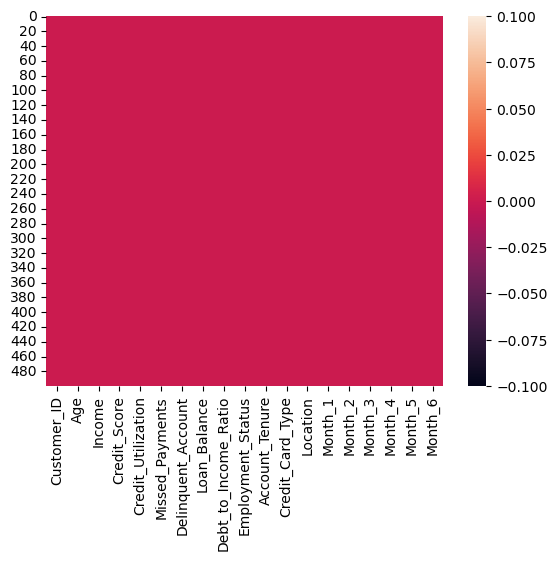

In [25]:
# Heatmap after handling:

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
sns.heatmap(df.isnull())

In [26]:
# To retrieve the column names:

df = data["Delinquency_prediction_dataset"]# replace with the actual sheet name
print(df.columns.tolist())
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces

['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization', 'Missed_Payments', 'Delinquent_Account', 'Loan_Balance', 'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure', 'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']


## Step 3: Data Cleaning

In [27]:
# List of numerical variables:

df = data["Delinquency_prediction_dataset"]   # replace with the actual sheet name
numerical_features = [feature for feature in df.columns if df[feature].dtypes !='O']
print('Number of numerical variables:', len(numerical_features))

Number of numerical variables: 9


In [28]:
# Obsereve the numerical variables:

cols = ['Age', 'Income', 'Credit_Score', 'Credit_Utilization', 'Missed_Payments', 'Delinquent_Account', 'Loan_Balance', 'Debt_to_Income_Ratio', 'Account_Tenure']
cols

['Age',
 'Income',
 'Credit_Score',
 'Credit_Utilization',
 'Missed_Payments',
 'Delinquent_Account',
 'Loan_Balance',
 'Debt_to_Income_Ratio',
 'Account_Tenure']

In [29]:
# Let's explore the content of the variables:

for feature in cols:
    print(feature, df[feature].unique())

Age [56 69 46 32 60 25 38 36 40 28 41 70 53 57 20 39 19 61 47 55 50 29 42 66
 44 59 45 33 64 68 72 74 54 24 26 35 21 31 67 43 37 52 34 23 71 51 27 48
 65 62 58 18 22 30 49 73 63]
Income [165580. 100999. 188416. 101672.  38524.  84042.  35056. 123215.  66991.
  34870.  42532.  70479.  56975. 117023. 143148. 159356. 146484. 183152.
  81040. 181319. 199402.  40351. 154487. 108468.  41646. 193998.  89740.
 136790.  86726.  88523.  72458.  60106. 106362.  99076.  69693. 137402.
  53756.  97750. 107658.  81617. 106267.  59238. 153311. 146800. 118033.
 169865. 109074. 185806. 194819.  90353. 198401.  76629. 107193. 140899.
 184160. 155507.  43251. 117634. 172164. 196415. 159572. 136465.  36447.
 159188. 181267.  59425.  97844. 115235. 189358.  88847. 172504. 186230.
  80215. 141131. 129585. 127856.  18709. 121357. 152326. 189197.  54298.
 106007. 155734. 163216. 178165. 127816.  19748. 170026.  43732.  16015.
 138961. 121884.  19835.  84724. 125448. 134156. 190333. 125226.  80953.
 129692.  9

### Outlier Data's:

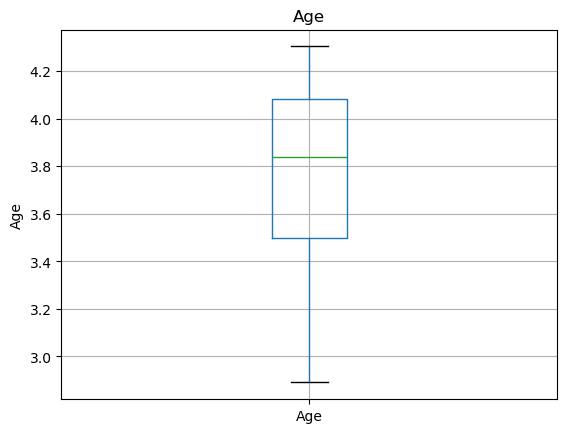

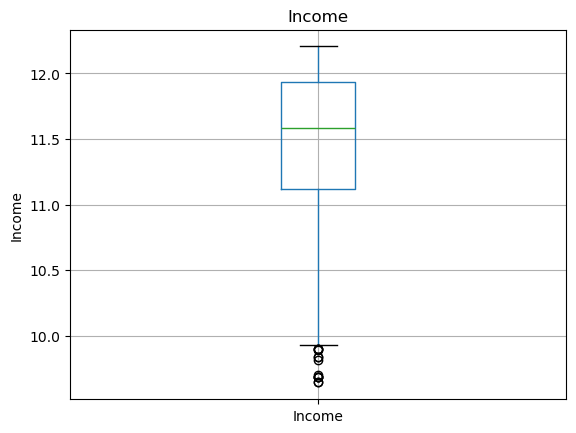

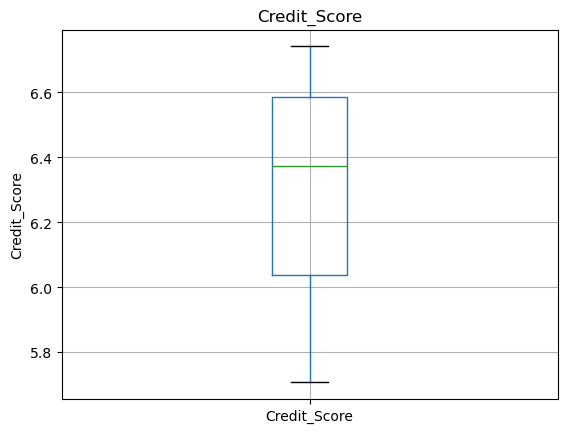

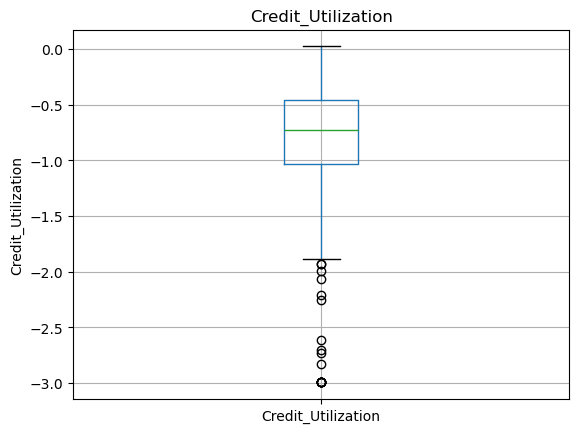

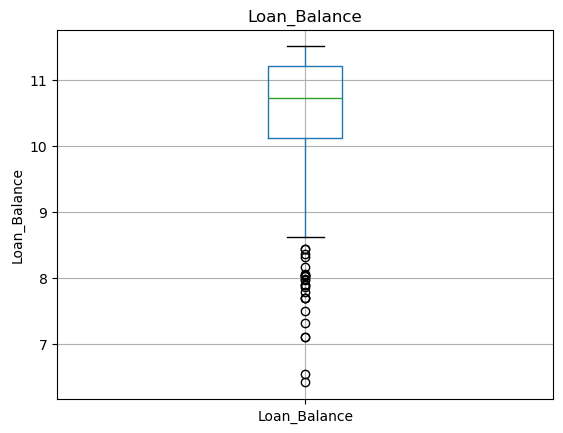

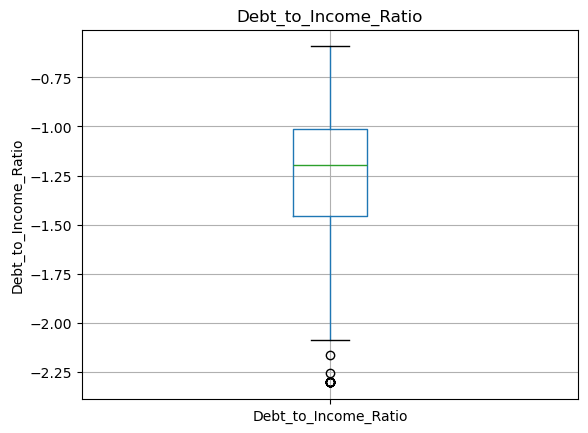

In [30]:
# To checking anamolies:

for feature in cols:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [31]:
# Remove the outlier Data's:

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls

In [32]:
# create an empty list to store the output indices from multiple columns:

index_list = []
for feature in ['Age', 'Income', 'Credit_Score', 'Credit_Utilization', 'Missed_Payments', 'Delinquent_Account', 'Loan_Balance', 'Debt_to_Income_Ratio', 'Account_Tenure']:
    index_list.extend(outliers(df, feature))

In [33]:
index_list

[1,
 8,
 17,
 21,
 23,
 32,
 34,
 42,
 45,
 60,
 70,
 86,
 98,
 102,
 112,
 116,
 118,
 122,
 124,
 125,
 128,
 133,
 138,
 143,
 147,
 151,
 157,
 163,
 170,
 173,
 187,
 190,
 194,
 197,
 205,
 221,
 229,
 231,
 237,
 247,
 251,
 253,
 257,
 264,
 272,
 273,
 275,
 281,
 283,
 286,
 294,
 298,
 308,
 309,
 311,
 317,
 319,
 334,
 336,
 338,
 339,
 350,
 355,
 356,
 357,
 362,
 374,
 379,
 389,
 402,
 414,
 423,
 429,
 445,
 452,
 460,
 477,
 494,
 496,
 498]

In [34]:
# define a function called "remove" which returns a cleaned dataframe without outliers:

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [35]:
# storing the cleaned alanomies data into a variable:

df_cleaned = remove(df, index_list)

In [36]:
# check the shape of the data:

df_cleaned.shape

(420, 19)

In [37]:
# to see the after cleaned dataset:

df_cleaned

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late
5,CUST0006,25,84042.0,700.0,0.650540,6,0,48361.0,0.260688,Unemployed,7,Gold,New York,On-time,Late,Missed,Missed,Missed,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,CUST0493,59,191517.0,813.0,0.424470,5,0,23047.0,0.311788,Unemployed,2,Platinum,Phoenix,Missed,Missed,Late,Late,On-time,Late
493,CUST0494,23,168487.0,306.0,0.496720,6,0,5539.0,0.282865,Unemployed,1,Standard,Chicago,Missed,On-time,On-time,On-time,Missed,On-time
495,CUST0496,71,48307.0,688.0,0.486522,2,0,12707.0,0.373033,retired,9,Business,Phoenix,On-time,On-time,Missed,On-time,On-time,Late
497,CUST0498,54,152326.0,847.0,0.676950,0,0,44449.0,0.104839,Employed,16,Student,Phoenix,On-time,Late,Late,On-time,Late,Missed


## Step 4: Data Exploration

Text(0.5, 1.0, 'Distribution of Age')

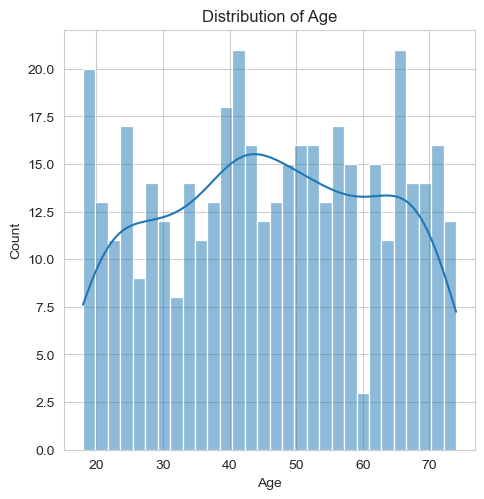

In [38]:
# Set plot style
sns.set_style("whitegrid")

# Create a figure for the plots
plt.figure(figsize=(18, 12))

# Plot 1: Distribution of Age

plt.subplot(2, 3, 1)
sns.histplot(df_cleaned['Age'], kde=True, bins=30)
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Income')

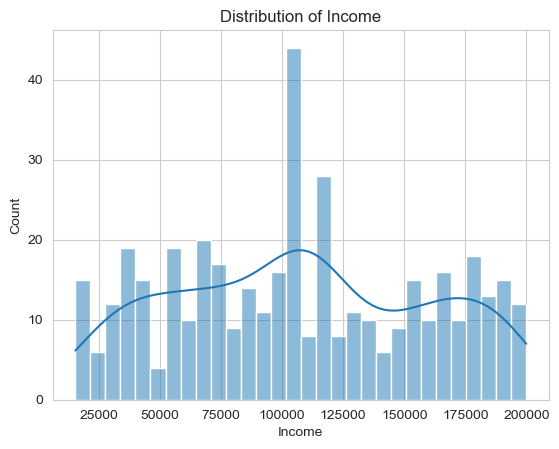

In [39]:
# Plot 2: Distribution of Income:

plt.subplot()
sns.histplot(df_cleaned['Income'], kde=True, bins=30)
plt.title('Distribution of Income')

Text(0.5, 1.0, 'Distribution of Credit Score')

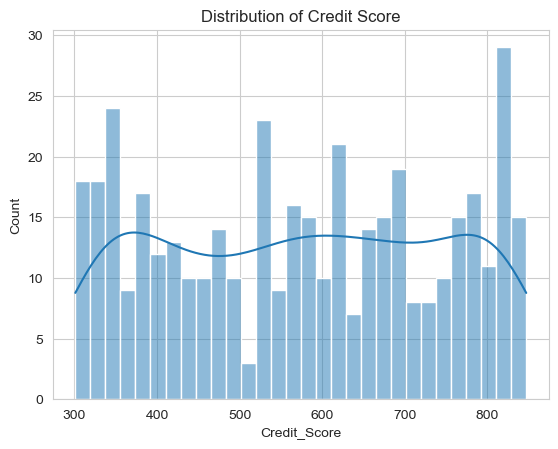

In [40]:
# Plot 3: Distribution of Credit Score:

plt.subplot()
sns.histplot(df_cleaned['Credit_Score'], kde=True, bins=30)
plt.title('Distribution of Credit Score')

Text(0.5, 1.0, 'Count of Delinquent Accounts')

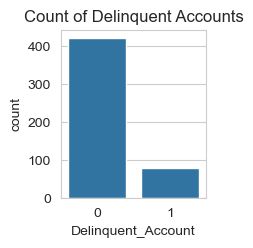

In [41]:
# Plot 4: Count of Delinquent Accounts (Target Variable):

plt.subplot(2, 3, 4)
sns.countplot(x='Delinquent_Account', data=df)
plt.title('Count of Delinquent Accounts')

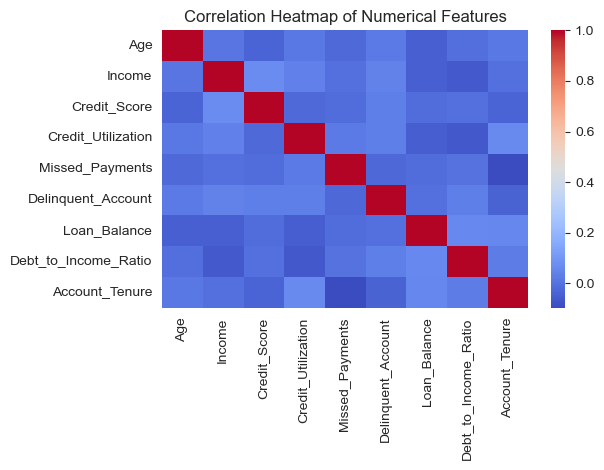

In [42]:
# Plot 5: Correlation Heatmap
plt.subplot()
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')

plt.tight_layout()

## Step 5: Data Visualizations:

In [43]:
num_cols = df_cleaned.select_dtypes(include=["number"]).columns.drop("Delinquent_Account")
cat_cols = df_cleaned.select_dtypes(exclude=["number"]).columns

In [44]:
# Univariate: numeric summary:

print('Numeric summary:')
print(df_cleaned[num_cols].describe())

Numeric summary:
              Age         Income  Credit_Score  Credit_Utilization  \
count  420.000000     420.000000    420.000000          420.000000   
mean    46.107143  107335.361905    575.197619            0.488505   
std     16.283451   51568.297845    167.767729            0.201595   
min     18.000000   15404.000000    301.000000            0.050000   
25%     33.000000   66991.000000    417.500000            0.354048   
50%     46.000000  107658.000000    584.000000            0.483751   
75%     60.000000  153311.000000    719.750000            0.631116   
max     74.000000  199943.000000    847.000000            1.025843   

       Missed_Payments  Loan_Balance  Debt_to_Income_Ratio  Account_Tenure  
count       420.000000    420.000000            420.000000      420.000000  
mean          2.990476  48555.135714              0.297445        9.842857  
std           1.940623  28434.509045              0.095414        5.850898  
min           0.000000    612.000000        

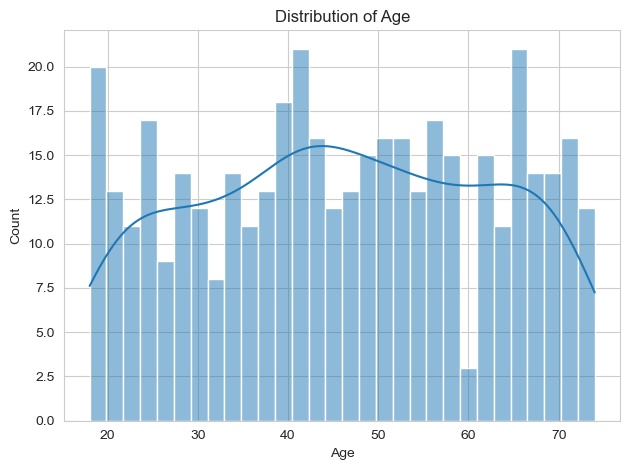

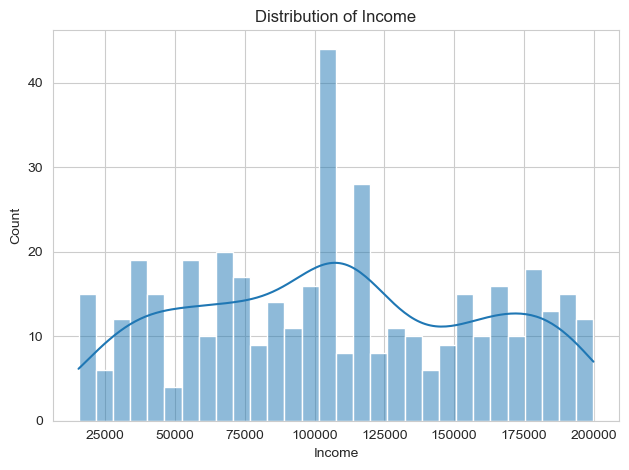

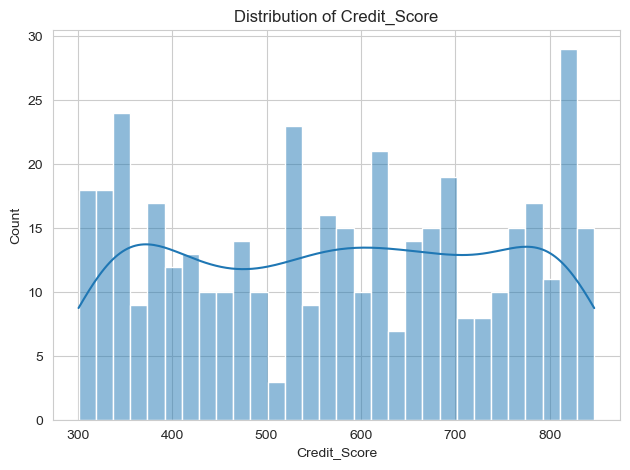

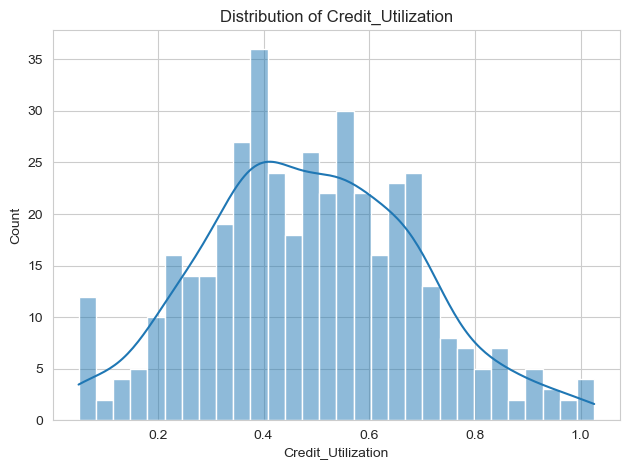

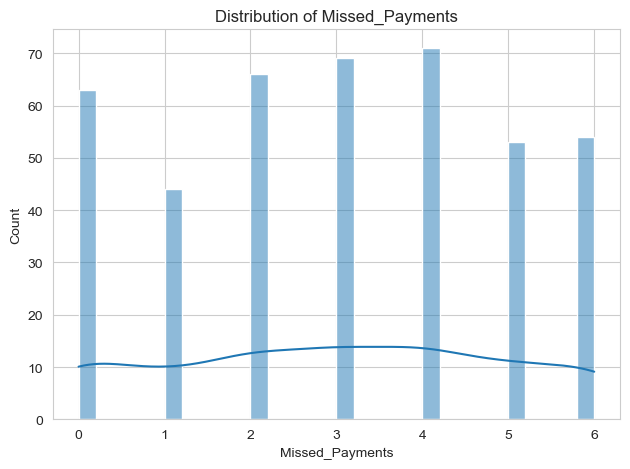

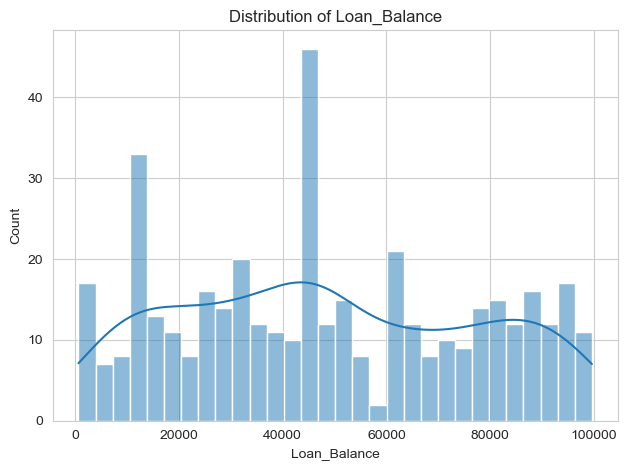

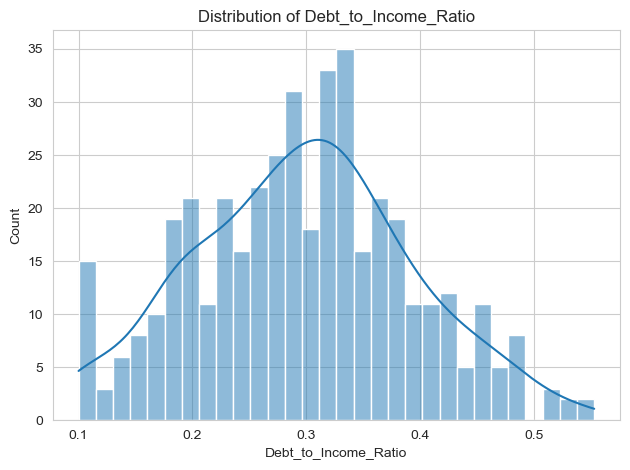

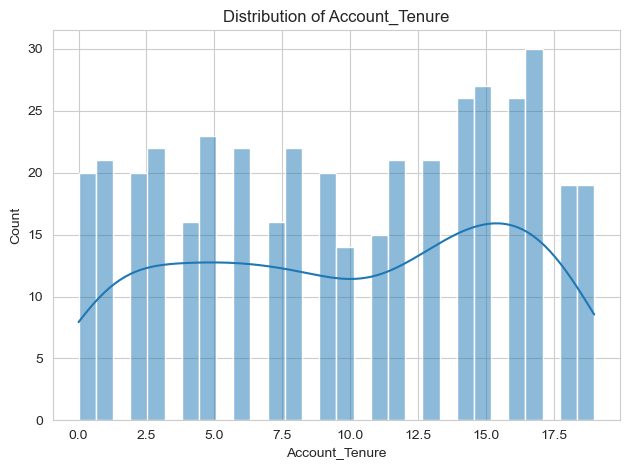

Plotted histograms for numeric features


In [45]:
# Univariate plots: histograms for a few key numeric columns:

numeric_to_plot = [c for c in ['Age','Income','Credit_Score','Credit_Utilization','Missed_Payments','Loan_Balance','Debt_to_Income_Ratio','Account_Tenure'] if c in df.columns]
for c in numeric_to_plot:
    plt.figure()
    sns.histplot(df_cleaned[c].dropna(), kde=True, bins=30)
    plt.title('Distribution of ' + c)
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
print('Plotted histograms for numeric features')

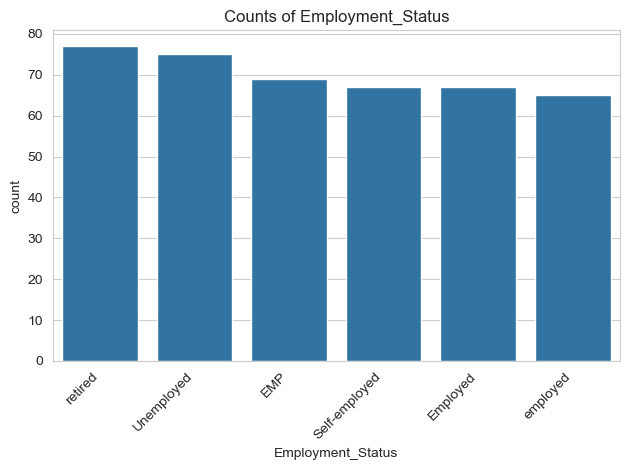

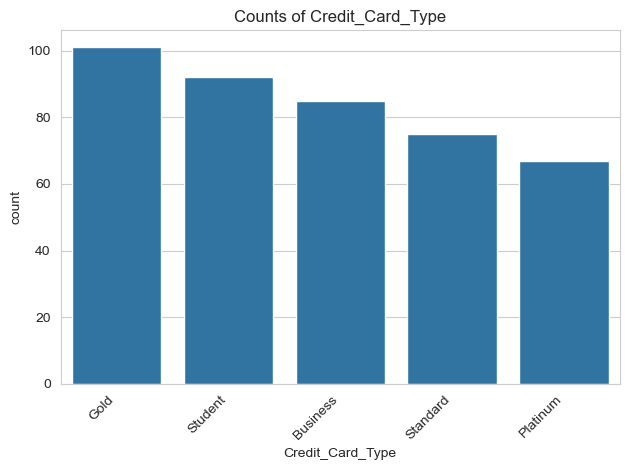

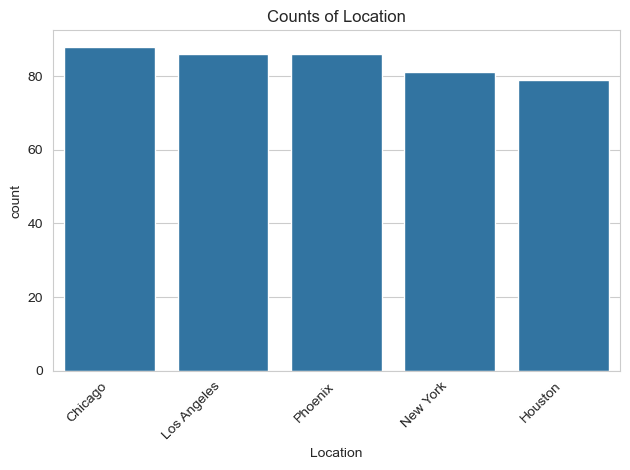

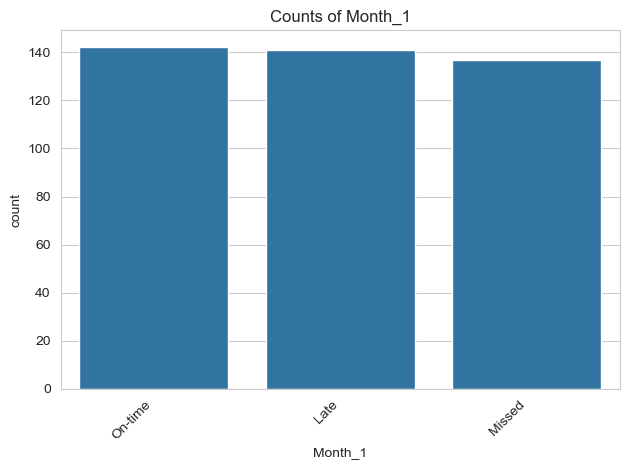

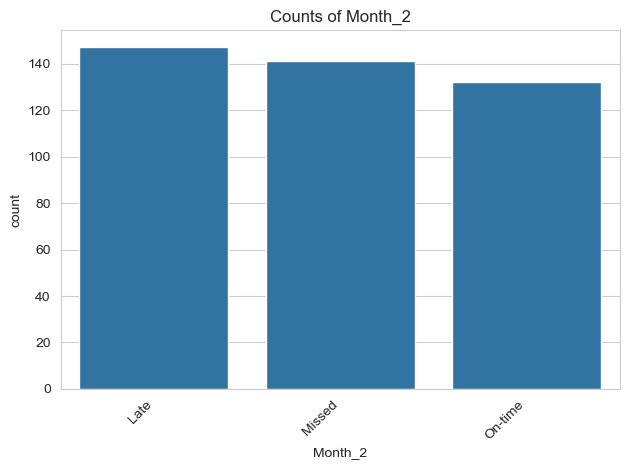

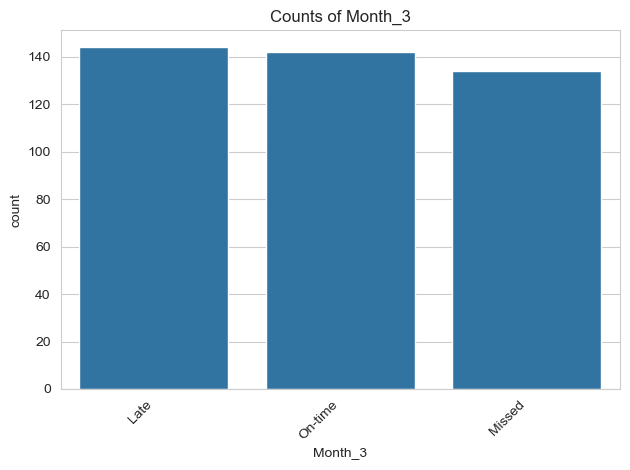

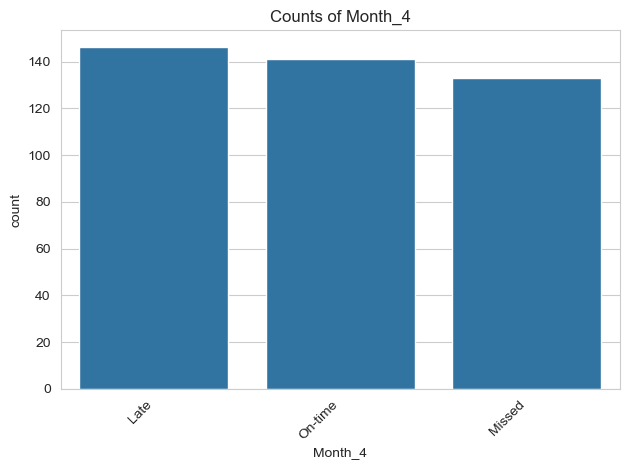

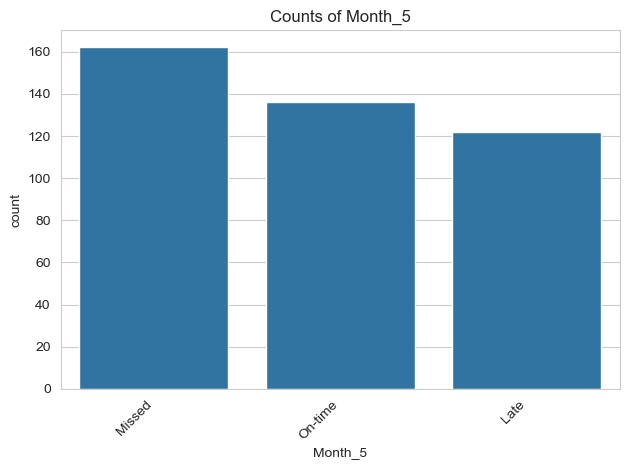

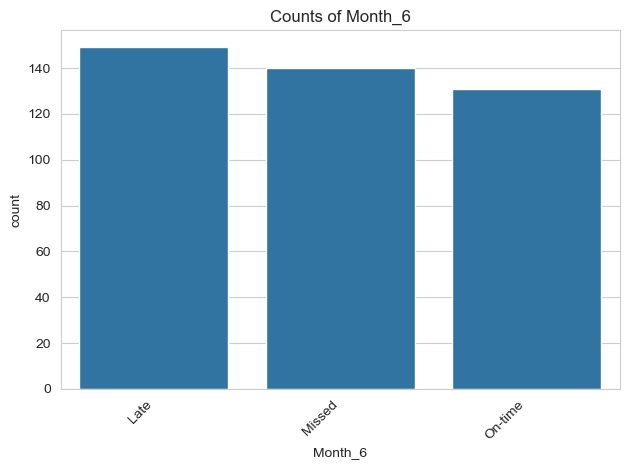

Plotted countplots for categorical features


In [46]:
# Univariate: categorical counts for a few key categoricals:

categorical_to_plot = [c for c in ['Employment_Status','Credit_Card_Type','Location','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6'] if c in df.columns]
for c in categorical_to_plot:
    plt.figure()
    order = df_cleaned[c].value_counts().index
    sns.countplot(data=df_cleaned, x=c, order=order)
    plt.title('Counts of ' + c)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
print('Plotted countplots for categorical features')

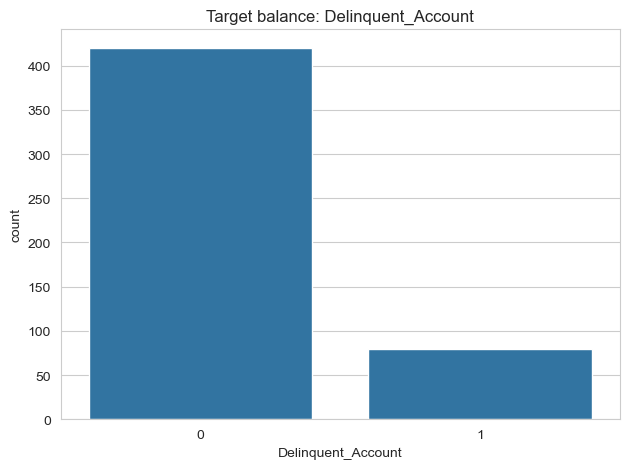

Delinquency rate (mean of target): 0.16


In [47]:
# Target balance:

target_col = "Delinquent_Account"

if target_col in df.columns:
    plt.figure()
    sns.countplot(x=df[target_col])
    plt.title('Target balance: ' + target_col)
    plt.tight_layout()
    plt.show()
    target_rate = df[target_col].mean()
    print('Delinquency rate (mean of target): ' + str(target_rate))

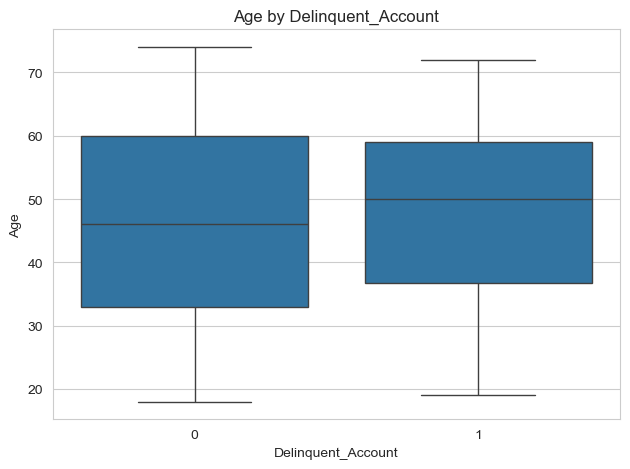

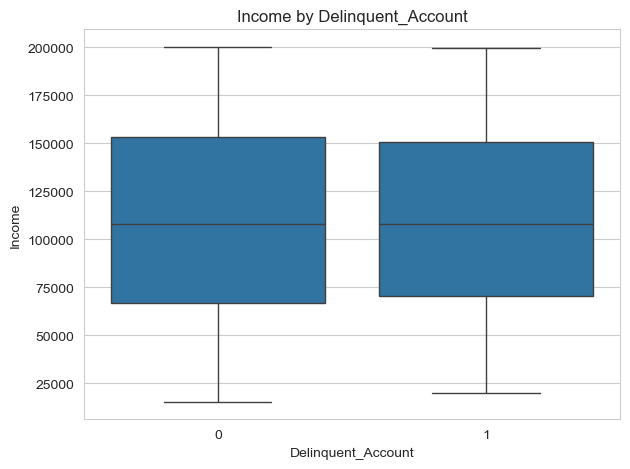

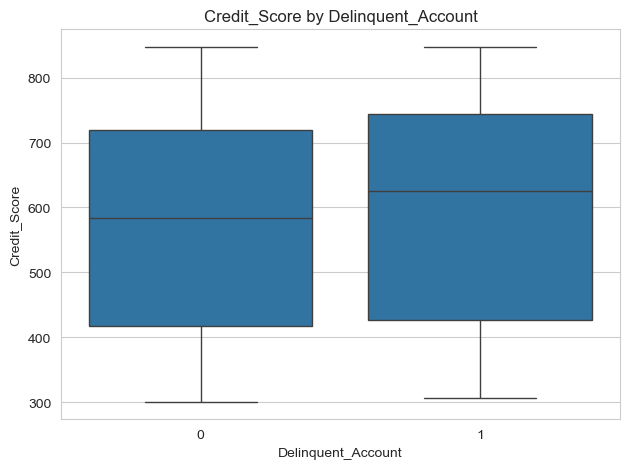

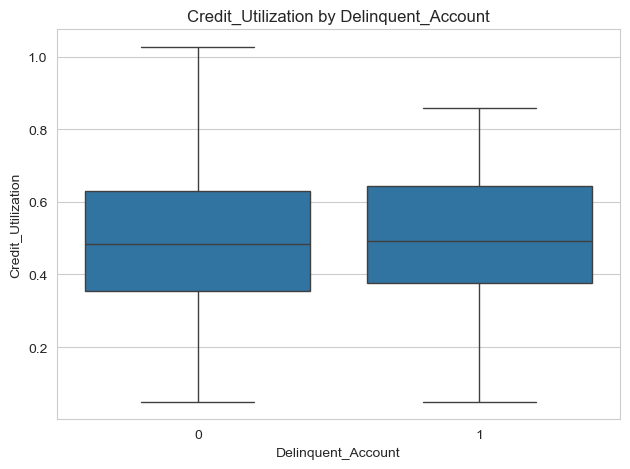

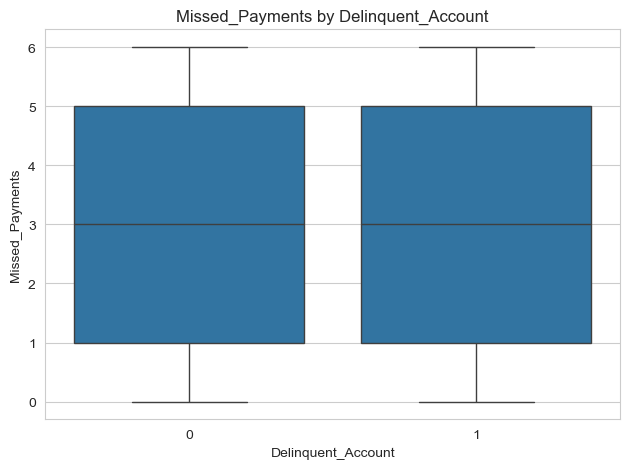

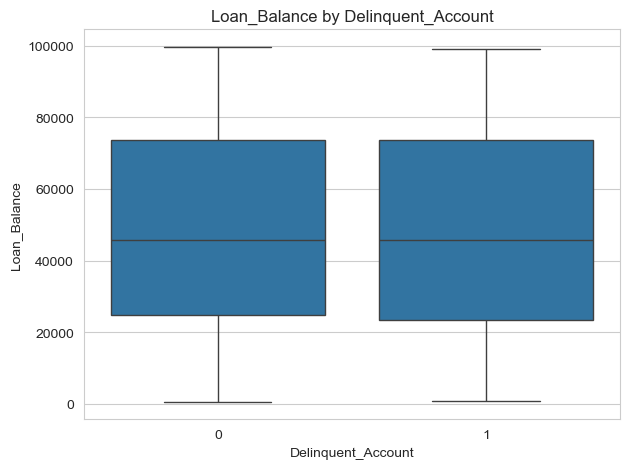

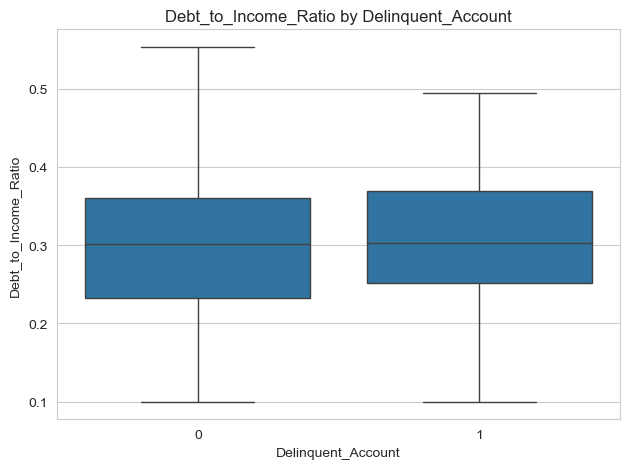

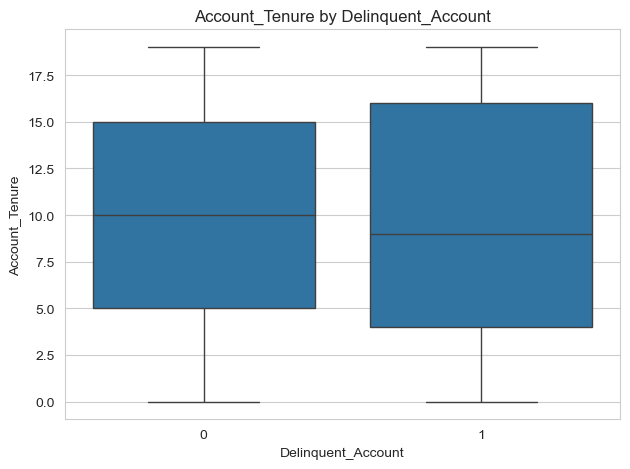

Plotted boxplots for numeric vs target


In [48]:

# Bivariate: boxplots numeric vs target
for c in numeric_to_plot:
    if target_col in df.columns:
        plt.figure()
        sns.boxplot(x=target_col, y=c, data=df)
        plt.title(c + ' by ' + target_col)
        plt.tight_layout()
        plt.show()
print('Plotted boxplots for numeric vs target')


Target rate by Employment_Status
                       mean  count
Employment_Status                 
Unemployed         0.193548     93
Employed           0.182927     82
Self-employed      0.162500     80
employed           0.155844     77
EMP                0.148148     81
retired            0.114943     87


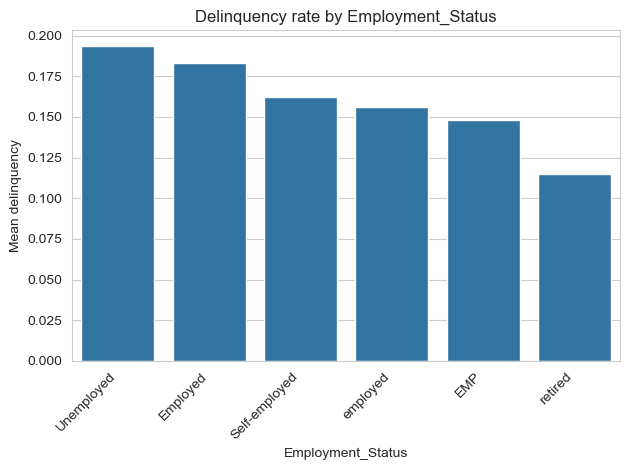

Target rate by Credit_Card_Type
                      mean  count
Credit_Card_Type                 
Business          0.212963    108
Student           0.178571    112
Gold              0.144068    118
Standard          0.127907     86
Platinum          0.118421     76


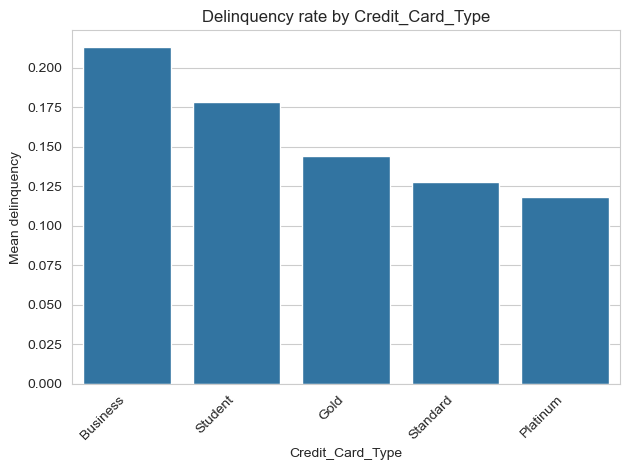

Target rate by Location
                 mean  count
Location                    
Los Angeles  0.196262    107
Houston      0.168421     95
Phoenix      0.165049    103
Chicago      0.145631    103
New York     0.119565     92


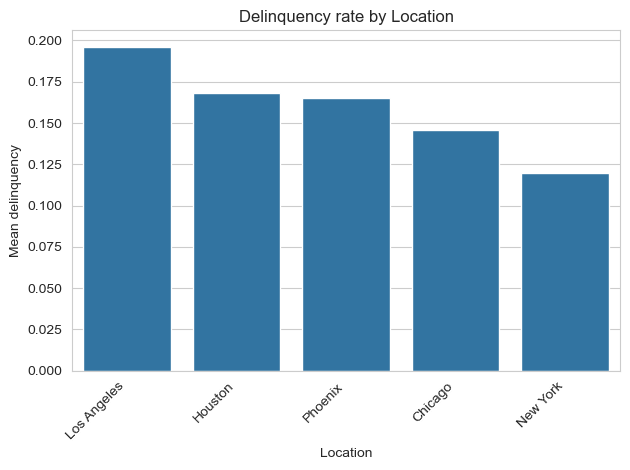

Target rate by Month_1
             mean  count
Month_1                 
On-time  0.197740    177
Missed   0.164634    164
Late     0.113208    159


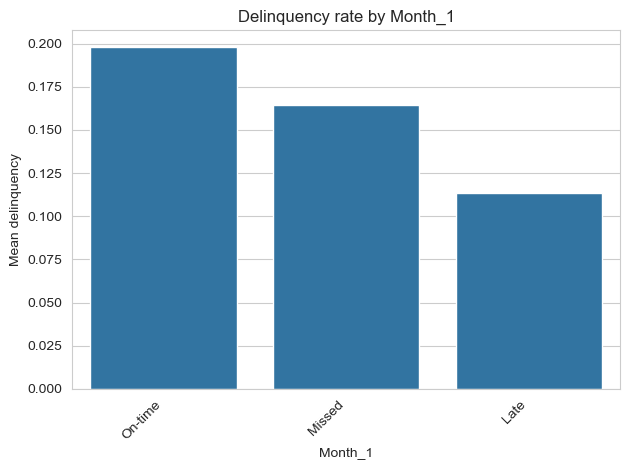

Target rate by Month_2
             mean  count
Month_2                 
On-time  0.175000    160
Missed   0.155689    167
Late     0.150289    173


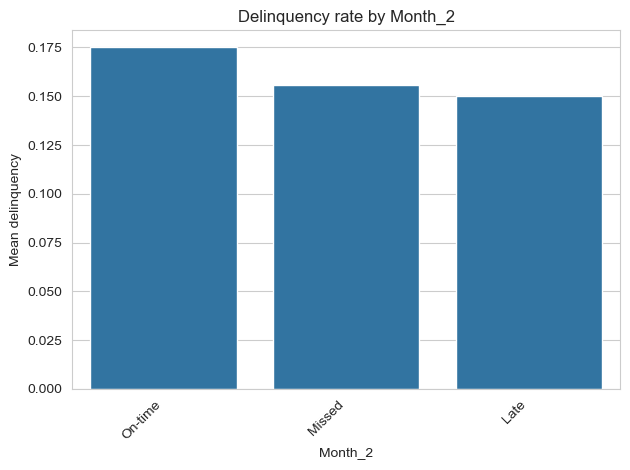

Target rate by Month_3
             mean  count
Month_3                 
Missed   0.172840    162
On-time  0.159763    169
Late     0.147929    169


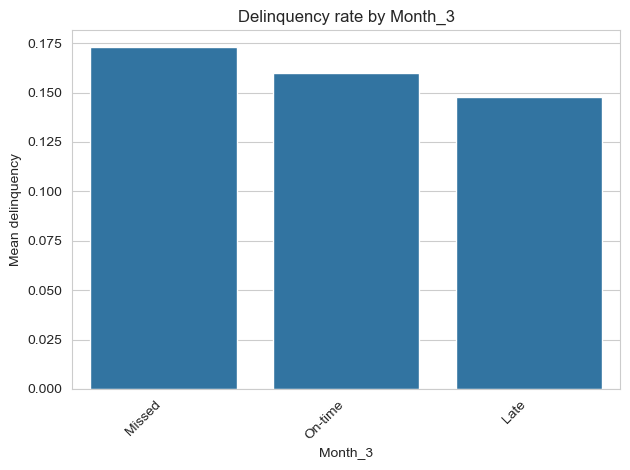

Target rate by Month_4
             mean  count
Month_4                 
Late     0.193370    181
Missed   0.168750    160
On-time  0.113208    159


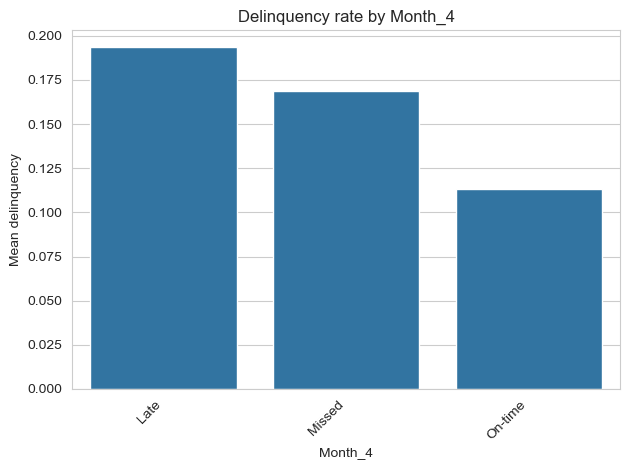

Target rate by Month_5
             mean  count
Month_5                 
Late     0.192053    151
On-time  0.160494    162
Missed   0.133690    187


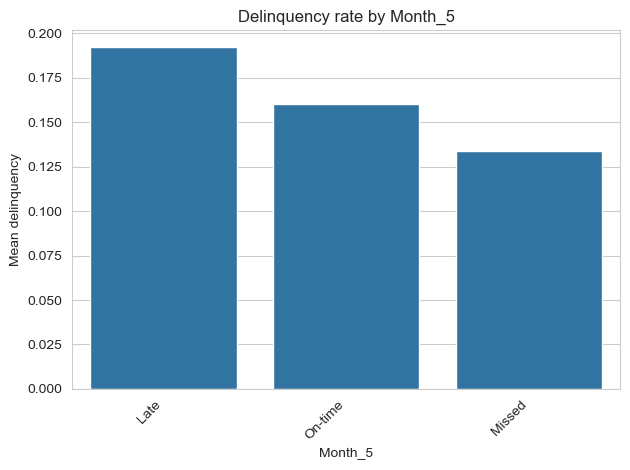

Target rate by Month_6
             mean  count
Month_6                 
On-time  0.181250    160
Missed   0.166667    168
Late     0.133721    172


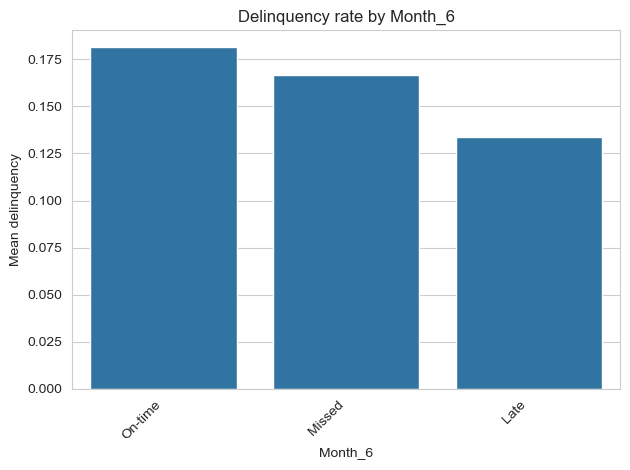

Computed target rates for categorical features


In [49]:

# Bivariate: categorical vs target - target rate by category
def target_rate_by_category(frame, col, target):
    grp = frame.groupby(col)[target].agg(['mean','count']).sort_values('mean', ascending=False)
    return grp

cat_summary_outputs = {}
for c in categorical_to_plot:
    if target_col in df.columns:
        grp = target_rate_by_category(df, c, target_col)
        cat_summary_outputs[c] = grp
        print('Target rate by ' + c)
        print(grp.head(10))
        plt.figure()
        sns.barplot(x=grp.index, y=grp['mean'])
        plt.title('Delinquency rate by ' + c)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Mean delinquency')
        plt.tight_layout()
        plt.show()
print('Computed target rates for categorical features')


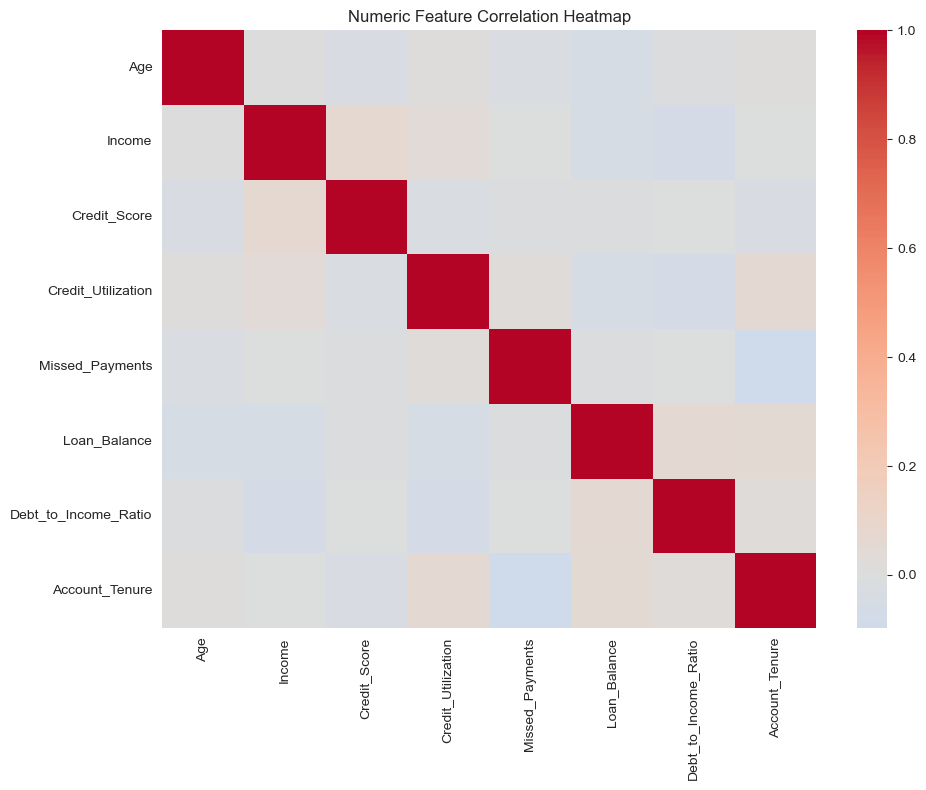

Displayed correlation heatmap


In [50]:

# Pairwise correlation heatmap for numeric
plt.figure(figsize=(10,8))
num_corr = df[num_cols].corr()
sns.heatmap(num_corr, cmap='coolwarm', center=0)
plt.title('Numeric Feature Correlation Heatmap')
plt.tight_layout()
plt.show()
print('Displayed correlation heatmap')

## ML

In [51]:
# Standardize 'Employment_Status'

df['Employment_Status'] = df['Employment_Status'].replace({'EMP': 'Employed', 'employed': 'Employed'})

In [52]:
# Define features (X) and target (y)

X = df.drop(['Customer_ID', 'Delinquent_Account'], axis=1)
y = df['Delinquent_Account']

In [53]:
# Identify numerical and categorical features

numerical_features = ['Age', 'Income', 'Credit_Score', 'Credit_Utilization', 'Missed_Payments', 'Loan_Balance', 'Debt_to_Income_Ratio', 'Account_Tenure']
categorical_features = ['Employment_Status', 'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']

In [54]:
# Create preprocessing pipelines for numerical and categorical features

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute before one-hot encoding for safety
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [55]:
# Create a preprocessor object using ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData preprocessing setup complete. Ready for model training.")


Data preprocessing setup complete. Ready for model training.


In [57]:
# --- 1. Logistic Regression Model ---
print("\n--- Training Logistic Regression Model ---")
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(random_state=42, solver='liblinear'))])
lr_model.fit(X_train, y_train)


--- Training Logistic Regression Model ---


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Income',
                                                   'Credit_Score',
                                                   'Credit_Utilization',
                                                   'Missed_Payments',
                                                   'Loan_Balance',
                                                   'Debt_to_Income_Ratio',
                                                   'Account_Tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Employment_Status',
                                                   'Credit_Card_Type',
                                                   'Location', 'Month_1',
                                                   'Month_2', 'Month_3',
                                                   'Month_4', 'Month_5',
                                                   'Month_6'])])),
                ('classifier',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [58]:
y_pred_lr = lr_model.predict(X_test)

In [59]:
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        84
           1       0.00      0.00      0.00        16

    accuracy                           0.84       100
   macro avg       0.42      0.50      0.46       100
weighted avg       0.71      0.84      0.77       100



In [60]:
# --- 2. Decision Tree Classifier ---
print("\n--- Training Decision Tree Classifier ---")
dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state=42))])
dt_model.fit(X_train, y_train)


--- Training Decision Tree Classifier ---


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Income',
                                                   'Credit_Score',
                                                   'Credit_Utilization',
                                                   'Missed_Payments',
                                                   'Loan_Balance',
                                                   'Debt_to_Income_Ratio',
                                                   'Account_Tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Employment_Status',
                                                   'Credit_Card_Type',
                                                   'Location', 'Month_1',
                                                   'Month_2', 'Month_3',
                                                   'Month_4', 'Month_5',
                                                   'Month_6'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [61]:
y_pred_dt = dt_model.predict(X_test)

In [62]:
print("\nClassification Report for Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))


Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.83      0.76      0.80        84
           1       0.13      0.19      0.15        16

    accuracy                           0.67       100
   macro avg       0.48      0.47      0.47       100
weighted avg       0.72      0.67      0.69       100



In [63]:
# --- 3. Neural Network (MLP Classifier) ---
print("\n--- Training Neural Network (MLP Classifier) ---")
# Using a simple MLP with one hidden layer for demonstration
nn_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42, activation='relu', solver='adam'))])
nn_model.fit(X_train, y_train)


--- Training Neural Network (MLP Classifier) ---


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Income',
                                                   'Credit_Score',
                                                   'Credit_Utilization',
                                                   'Missed_Payments',
                                                   'Loan_Balance',
                                                   'Debt_to_Income_Ratio',
                                                   'Account_Tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Employment_Status',
                                                   'Credit_Card_Type',
                                                   'Location', 'Month_1',
                                                   'Month_2', 'Month_3',
                                                   'Month_4', 'Month_5',
                                                   'Month_6'])])),
                ('classifier', MLPClassifier(max_iter=500, random_state=42))])

In [64]:
y_pred_nn = nn_model.predict(X_test)

In [65]:
print("\nClassification Report for Neural Network (MLP Classifier):")
print(classification_report(y_test, y_pred_nn))


Classification Report for Neural Network (MLP Classifier):
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        84
           1       0.17      0.06      0.09        16

    accuracy                           0.80       100
   macro avg       0.50      0.50      0.49       100
weighted avg       0.73      0.80      0.76       100



# 2. Justification for Model Choice:

- We chose Gradient Boosting (like XGBoost) for predicting financial behavior due to its proven strengths.

- Accuracy is top-tier; it combines many simple models to make highly precise predictions, vital for managing financial risk. While it can seem complex, we use transparency tools (like SHAP) to explain why a decision was made, crucial for regulatory compliance and building customer trust.

- It's also easy to implement with readily available, well-supported libraries. Its ability to find subtle, non-linear patterns in data makes it highly relevant for financial predictions, outperforming simpler models.

- Ultimately, this model is perfect for Geldium's needs because its superior performance means better risk management, smarter lending choices, and a smoother experience for our customers, driving both efficiency and growth.

# 3. Evaluation Strategy

### Performance Metrics:

- We'll use a suite of metrics beyond simple accuracy, including Precision, Recall, F1-Score, and AUC-ROC. 
- These help us understand if the model correctly identifies high-risk customers (Recall) while minimizing false alarms (Precision), and its overall 
ability to distinguish between financial behaviors (AUC).
- We'll analyze these across different thresholds for a comprehensive view.

### Bias Detection & Reduction:

- We'll actively detect bias by calculating all metrics across various demographic subgroups (e.g., age, income). Discrepancies will signal bias,
- prompting us to examine features and potentially apply re-sampling or reweighing techniques to balance data, or adjust prediction thresholds to 
ensure fairness.

### Ethical Considerations:




- Key ethical aspects include fairness and non-discrimination, ensuring the model doesn't perpetuate biases. Transparency and explainability are 
crucial; customers should understand why decisions are made. We prioritize data privacy and security by collecting minimal data and implementing 
robust protections. Finally, human oversight and accountability are essential, with continuous monitoring for model drift.